In [3]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import copy
import warnings
# import math
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
# from sklearn.preprocessing import label_binarize
# from scipy import interp
# from itertools import cycle, zip_longest, chain
# import pickle
# from MVDD.MVDD import MVDD
# import MVDD.MVDD_Generator as mvGen

import model_comp as MC

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rc('font', size=12)
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
## Load Hemo Training Escape Data
#Load original dataframes
escHemo = pd.read_csv('../Data/Preprocessed Data/ESCAPE_Hemo.csv', index_col='ID')
escdeath = escHemo['ScoreDeath']
escrehosp = escHemo['ScoreRehosp']
escreadm = escHemo['ScoreReadmission']

# Preprocess and create training and testing sets
escHemo = escHemo.drop('Score', axis=1)
escHemo = escHemo.drop('ScoreDeath', axis=1)
escHemo = escHemo.drop('ScoreRehosp', axis=1)
escHemo = escHemo.drop('ScoreReadmission', axis=1)
escHemo = escHemo.replace(np.inf, 0)
escHemo = escHemo.fillna(0)

In [7]:
## Load hemo validation
# card shock
cardShockHemo = pd.read_csv("../Data Validation/Cardiogenic Shock/Preprocessed Data/CardiogenicShock_Hemo.csv", sep=",", index_col='ID')
cardShockHemodeath = cardShockHemo['ScoreDeath']
cardShockHemorehosp = cardShockHemo['ScoreRehosp']

cardShockHemo = cardShockHemo.drop('ScoreDeath', axis=1)
cardShockHemo = cardShockHemo.drop('Score', axis=1)
cardShockHemo = cardShockHemo.drop('ScoreRehosp', axis=1)
cardShockHemo = cardShockHemo.drop('ScoreReadmission', axis=1)
cardShockHemo = cardShockHemo.replace(np.inf, 0)
cardShockHemo = cardShockHemo.fillna(0)

# serial cardiac
serialHemo = pd.read_csv("../Data Validation/Serial Cardiac Caths/Preprocessed Data/SerialCardiac_Hemo.csv", sep=",", index_col='ID')
serialHemodeath = serialHemo['ScoreDeath']
serialHemorehosp = serialHemo['ScoreRehosp']

serialHemo = serialHemo.drop('ScoreDeath', axis=1)
serialHemo = serialHemo.drop('Score', axis=1)
serialHemo = serialHemo.drop('ScoreRehosp', axis=1)
serialHemo = serialHemo.drop('ScoreReadmission', axis=1)
serialHemo = serialHemo.replace(np.inf, 0)
serialHemo = serialHemo.fillna(0)



In [12]:
## Load all data Training Escape Data
#Load original dataframes
escAllData = pd.read_csv('../Data/Preprocessed Data/ESCAPE_AllData.csv', index_col='ID')
escAllDatadeath = escAllData['ScoreDeath']
escAllDatarehosp = escAllData['ScoreRehosp']
escAllDatareadm = escAllData['ScoreReadmission']

# Preprocess and create training and testing sets
escAllData = escAllData.drop('Score', axis=1)
escAllData = escAllData.drop('ScoreDeath', axis=1)
escAllData = escAllData.drop('ScoreRehosp', axis=1)
escAllData = escAllData.drop('ScoreReadmission', axis=1)
escAllData = escAllData.replace(np.inf, 0)
escAllData = escAllData.fillna(0)


In [23]:
## Load all data validation
# card shock
cardShockAllData = pd.read_csv("../Data Validation/Cardiogenic Shock/Preprocessed Data/CardiogenicShock_AllData.csv", sep=",", index_col='ID')
cardShockAllDatadeath = cardShockAllData['ScoreDeath']
cardShockAllDatarehosp = cardShockAllData['ScoreRehosp']

cardShockAllData = cardShockAllData.drop('ScoreDeath', axis=1)
cardShockAllData = cardShockAllData.drop('Score', axis=1)
cardShockAllData = cardShockAllData.drop('ScoreRehosp', axis=1)
cardShockAllData = cardShockAllData.drop('ScoreReadmission', axis=1)
cardShockAllData = cardShockAllData.replace(np.inf, 0)
cardShockAllData = cardShockAllData.fillna(0)

# serial cardiac
serialAllData = pd.read_csv("../Data Validation/Serial Cardiac Caths/Preprocessed Data/SerialCardiac_AllData.csv", sep=",", index_col='ID')
serialAllDatadeath = serialAllData['ScoreDeath']
serialAllDatarehosp = serialAllData['ScoreRehosp']

serialAllData = serialAllData.drop('ScoreDeath', axis=1)
serialAllData = serialAllData.drop('Score', axis=1)
serialAllData = serialAllData.drop('ScoreRehosp', axis=1)
serialAllData = serialAllData.drop('ScoreReadmission', axis=1)
serialAllData = serialAllData.replace(np.inf, 0)
serialAllData= serialAllData.fillna(0)

#best
bestAllData = pd.read_csv("../Data Validation/BEST/Preprocessed Data/BEST_AllData.csv", sep=",", index_col='ID')
bestAllDatadeath = bestAllData['ScoreDeath']
bestAllDatarehosp = bestAllData['ScoreRehosp']

bestAllData = bestAllData.drop('ScoreDeath', axis=1)
bestAllData = bestAllData.drop('Score', axis=1)
bestAllData = bestAllData.drop('ScoreRehosp', axis=1)
bestAllData = bestAllData.drop('ScoreReadmission', axis=1)
bestAllData = bestAllData.replace(np.inf, 0)
bestAllData  = bestAllData.fillna(0)

#guide
guideAllData = pd.read_csv("../Data Validation/GUIDE-IT/Preprocessed Data/GUIDE-IT_AllData.csv", sep=",", index_col='ID')
guideAllDatadeath = guideAllData['ScoreDeath']
guideAllDatarehosp = guideAllData['ScoreDeath']

guideAllData = guideAllData.drop('ScoreDeath', axis=1)
guideAllData = guideAllData.drop('Score', axis=1)
guideAllData = guideAllData.drop('ScoreRehosp', axis=1)
guideAllData = guideAllData.drop('ScoreReadmission', axis=1)
guideAllData = guideAllData.replace(np.inf, 0)
guideAllData = guideAllData.fillna(0)

# Hemodynamics

## DeLvTxOutcome

In [36]:
xData = copy.deepcopy(hemo)
yData = death
xData.shape, yData.shape

modelName = "Hemo_DeLvTx_"

### KNN Model

In [37]:
# train model
knn = KNeighborsClassifier()
knn_train_metrics = trainCrossVal(xData, yData, model=knn, numFolds=5, modelName=modelName + "KNN", showIndividualROC=False)

# validate on validation datasets







*****Averaged Final Classification Results*****
Sensitivity (TPR): 0.254(±0.308)
Specificity (TNR): 0.811(±0.293)
Precision (PPV): 0.292(±0.395)
Negative Predictive Value (NPV): 0.811(±0.220)
FPR: 0.189(±0.293)
FNR: 0.746(±0.308)
Accuracy: 0.726(±0.294)
Averaged AUC: 0.532(±0.098)


# All Data

,Age,Gender,Race,Wt,BMI,InitialHospDays,TotalHospDays,NYHA,MLHFS,AF,...,HR,PV,MAP,PP,PPP,PPRatio,Score,ScoreDeath,ScoreRehosp,ScoreReadmission
ID,,,,,,,,,,,,,,,,,,,,,
72.0,88.0,2.0,1.0,57.100000,26.424175,9.0,16.0,4.0,76.0,1.0,...,104.0,12.452563,139.333333,26.0,0.276596,0.250000,3,1,2,5
72.0,88.0,2.0,1.0,52.000000,24.064047,9.0,16.0,3.0,76.0,1.0,...,92.0,12.452563,126.000000,26.0,0.302326,0.282609,3,1,2,5
72.0,37.0,2.0,2.0,64.863709,0.000000,0.0,0.0,3.0,0.0,1.0,...,0.0,0.000000,118.000000,28.0,0.341463,0.411765,1,2,3,2
81.0,69.0,1.0,1.0,102.363636,32.307675,5.0,13.0,4.0,21.0,1.0,...,70.0,-3.346568,125.333333,32.0,0.363636,0.457143,3,1,2,5
81.0,69.0,1.0,1.0,100.454545,31.705134,5.0,13.0,2.0,21.0,1.0,...,72.0,-3.346568,105.666667,34.0,0.441558,0.472222,3,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302.0,41.0,1.0,2.0,97.400000,40.541103,21.0,21.0,NaN,79.0,0.0,...,75.0,25.535155,130.000000,55.0,0.550000,0.733333,3,1,2,5
99912.0,46.0,1.0,1.0,78.636364,25.677180,2.0,2.0,4.0,89.0,0.0,...,67.0,-13.911732,174.666667,38.0,0.316667,0.567164,3,1,2,5
99912.0,46.0,1.0,1.0,78.200000,25.534694,2.0,2.0,3.0,89.0,0.0,...,60.0,-13.911732,140.666667,24.0,0.255319,0.400000,3,1,2,5


## DeLvTx Outcome

In [1]:
xData = alld
yData = death
xData.shape, yData.shape

modelName = "AllData_death_"

NameError: name 'alld' is not defined

Accuracy MVDD: [1.         0.99438202 0.99438202 0.98876404]
Averaged acc for all 5 classes: 0.99438202247191


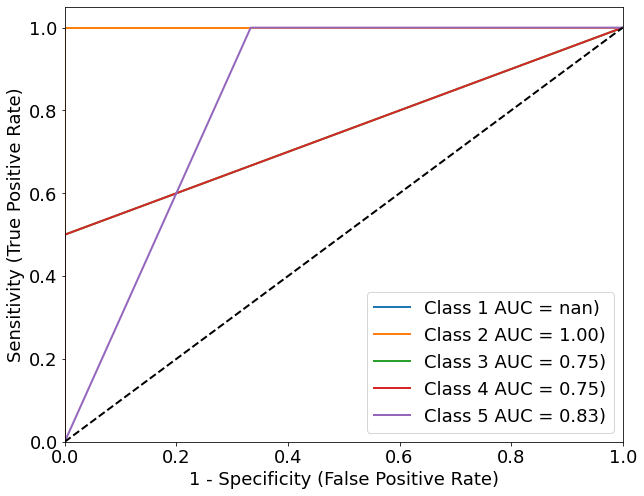

Accuracy MVDD: [0.99438202 0.99438202 0.98876404 0.99438202 0.98314607]
Averaged acc for all 5 classes: 0.9910112359550561


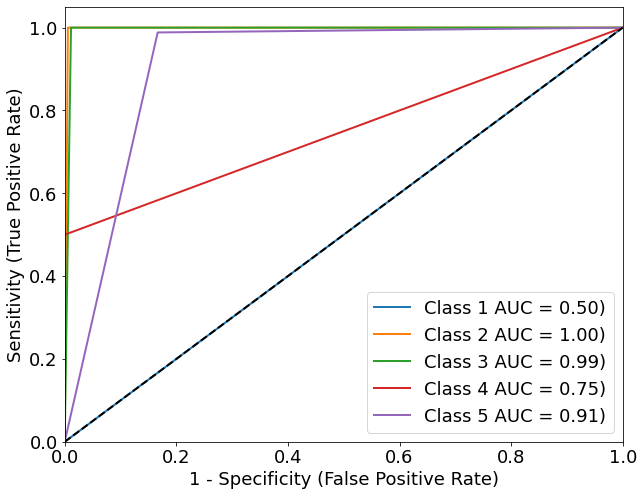

Accuracy MVDD: [0.99435028 0.98870056 0.99435028 0.98870056]
Averaged acc for all 5 classes: 0.9915254237288136


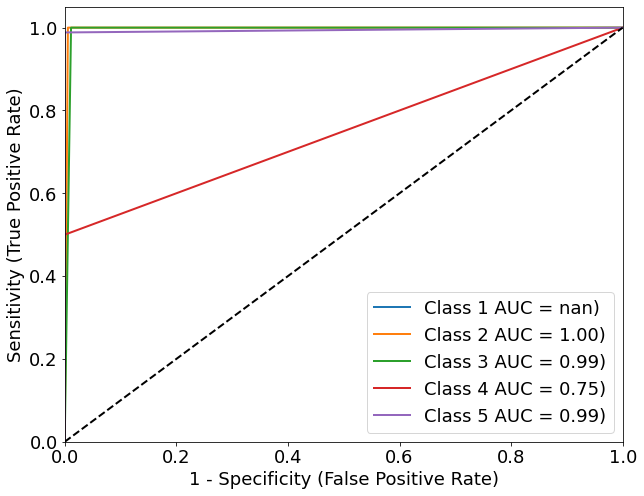

Accuracy MVDD: [0.99435028 0.99435028 0.99435028 0.99435028]
Averaged acc for all 5 classes: 0.9943502824858758


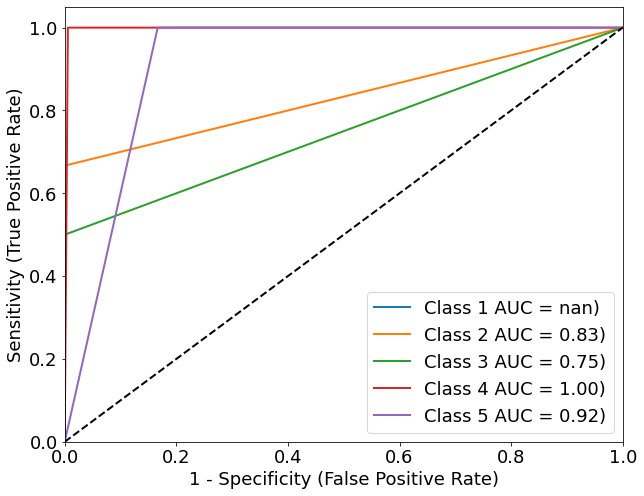

Accuracy MVDD: [0.98305085 0.98870056 0.98870056 0.98305085]
Averaged acc for all 5 classes: 0.9858757062146892


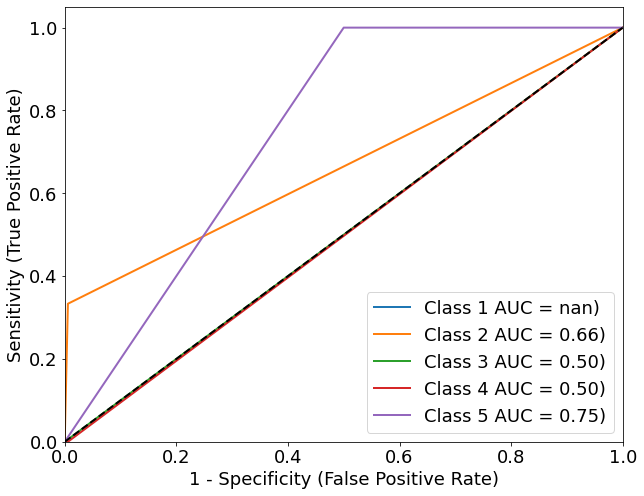

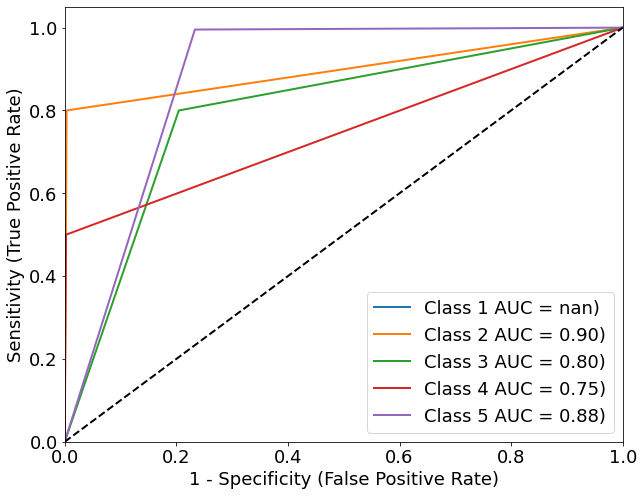

tpr list [array([1. , 0.5, 0.5, 1. ]), array([0.        , 1.        , 1.        , 0.5       , 0.98837209]), array([1.        , 1.        , 0.5       , 0.98837209]), array([0.66666667, 0.5       , 1.        , 1.        ]), array([0.33333333, 0.        , 0.        , 1.        ])]

*****Averaged Final Classification Results*****


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
# base model knn
knn = KNeighborsClassifier()
knn_metrics = trainCrossVal(xData, yData, model=knn, numFolds=5, modelName=modelName + "KNN", showIndividualROC=True)


Accuracy MVDD: [1. 1. 1. 1.]
Averaged acc for all 5 classes: 1.0


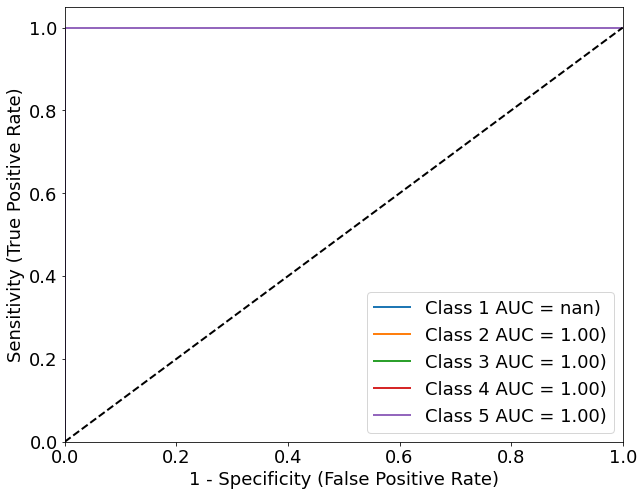

Accuracy MVDD: [0.99438202 0.98876404 0.99438202 0.99438202 0.99438202]
Averaged acc for all 5 classes: 0.9932584269662922


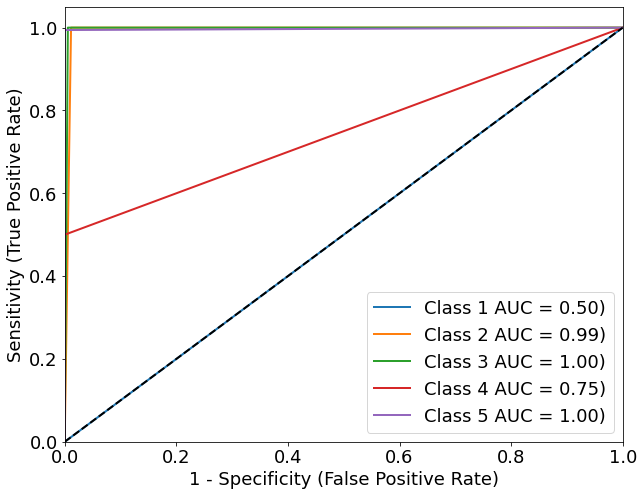

Accuracy MVDD: [0.99435028 0.98305085 1.         0.97740113]
Averaged acc for all 5 classes: 0.9887005649717515


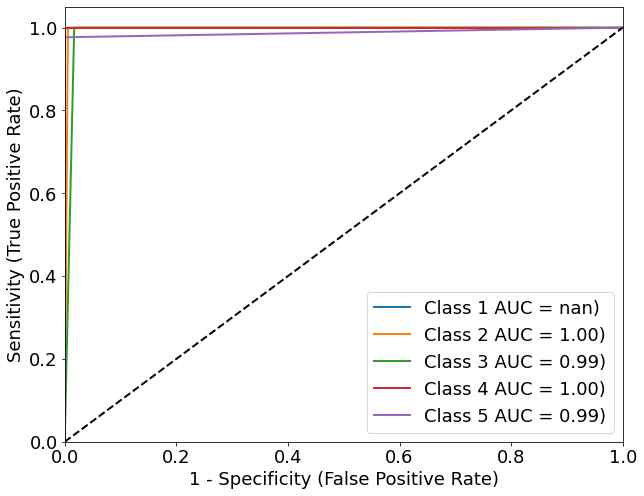

Accuracy MVDD: [0.99435028 0.98305085 0.99435028 0.98305085]
Averaged acc for all 5 classes: 0.9887005649717515


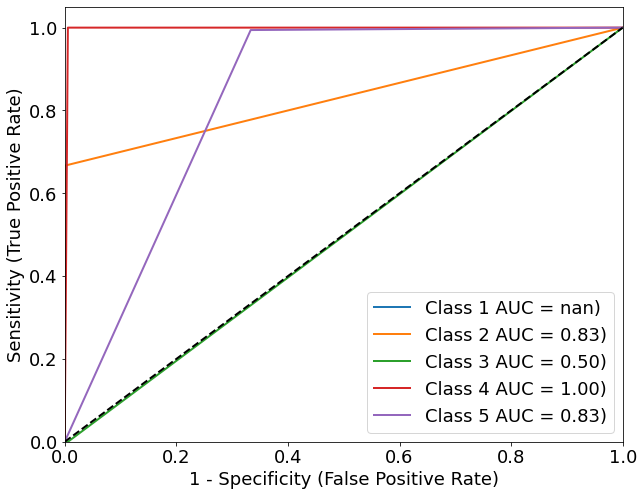

Accuracy MVDD: [0.98870056 0.99435028 0.99435028 0.98870056]
Averaged acc for all 5 classes: 0.9915254237288136


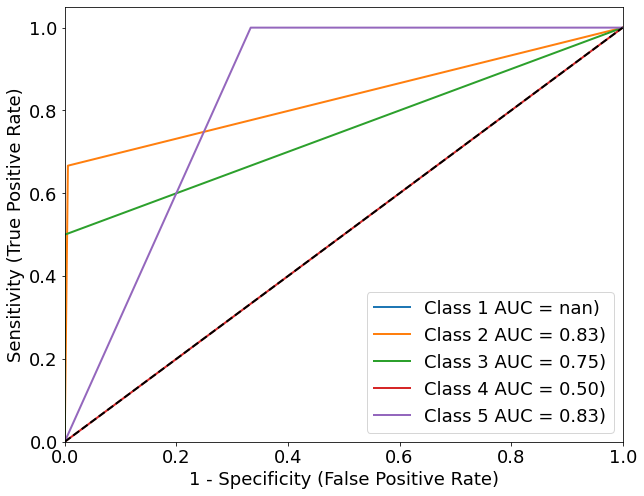

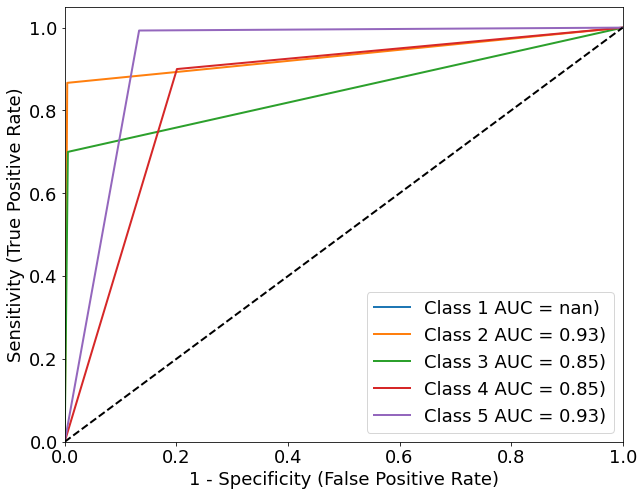


*****Averaged Final Classification Results*****


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [25]:
# base model decision tree

dt = DecisionTreeClassifier(random_state=100, max_depth=None)
dt_metrics = trainCrossVal(xData, yData, model=dt, numFolds=5, modelName=modelName+"DecisionTree", showIndividualROC=True)


Accuracy MVDD: [1.         0.99438202 1.         0.99438202]
Averaged acc for all 5 classes: 0.997191011235955


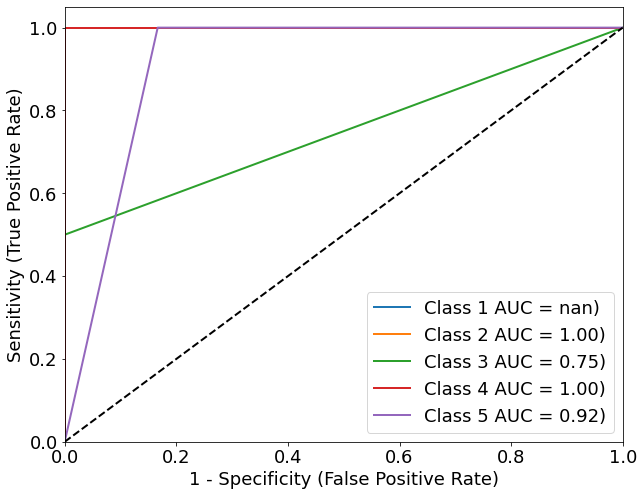

Accuracy MVDD: [0.99438202 0.99438202 0.99438202 0.99438202 0.98876404]
Averaged acc for all 5 classes: 0.9932584269662922


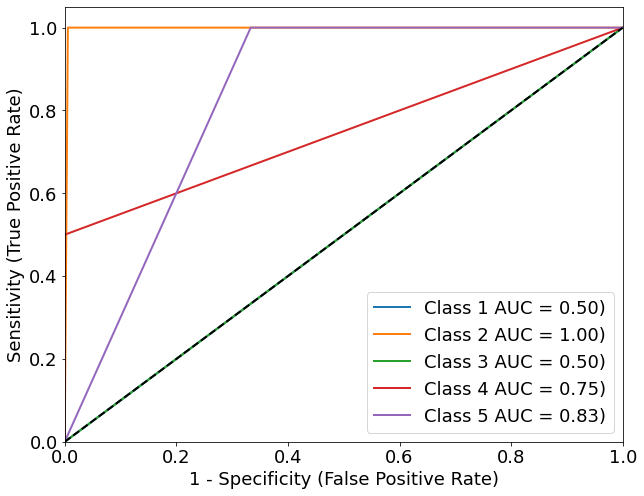

Accuracy MVDD: [0.99435028 0.99435028 0.99435028 0.99435028]
Averaged acc for all 5 classes: 0.9943502824858758


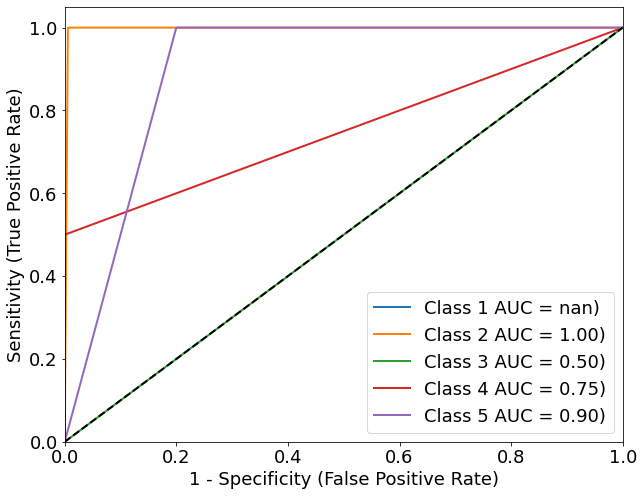

Accuracy MVDD: [0.98870056 0.98870056 0.98870056 0.98870056]
Averaged acc for all 5 classes: 0.9887005649717514


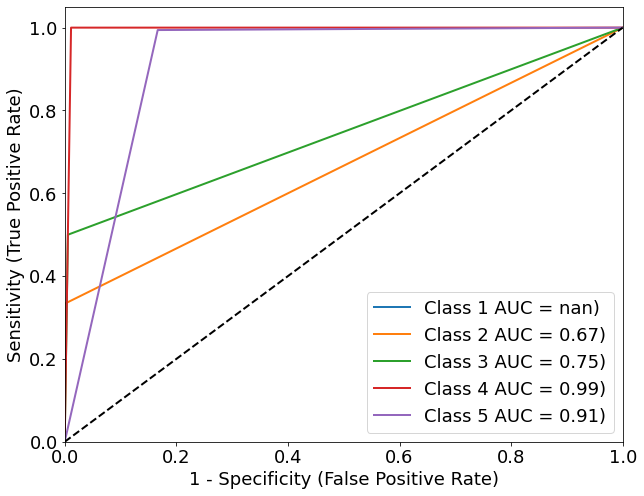

Accuracy MVDD: [0.98305085 0.98870056 0.98870056 0.98305085]
Averaged acc for all 5 classes: 0.9858757062146892


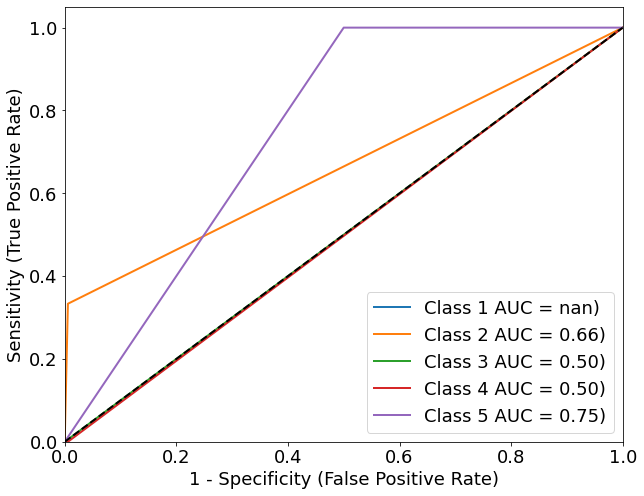

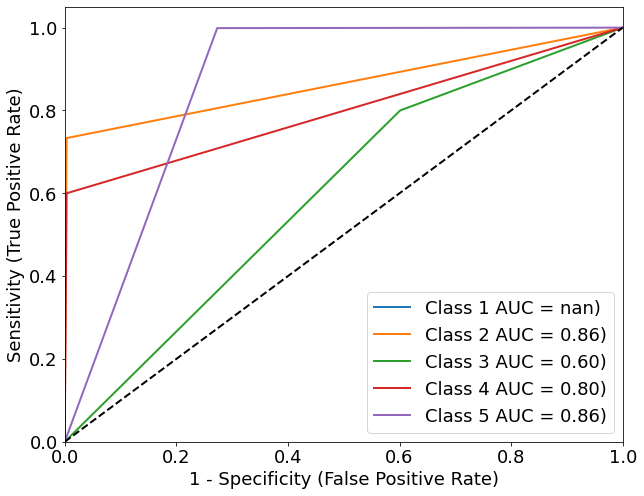


*****Averaged Final Classification Results*****


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
# random forest
rf = RandomForestClassifier(random_state=100, n_estimators=1000)
rf_metrics = trainCrossVal(xData, yData, model=rf, numFolds=5, modelName=modelName+"RandomForest", showIndividualROC=True)


In [ ]:
# Make dataframe of stats
columns=["TPR", "TPR SD", "TPR CI", "TNR", "TNR SD", "TNR CI", "PPV", "PPV SD", "PPV CI",
             "NPV", "NPV SD", "NPV CI", "FPR", "FPR SD", "FPR CI", "FNR", "FNR SD", "FNR CI",
             "Acc", "Acc SD", "Acc CI", "AUC", "AUC SD", "AUC CI"]

mets = pd.DataFrame([knn_metrics, dt_metrics, rf_metrics], columns=columns)
mets.index = ["KNN", "DT", "RF"]
mets.to_csv("Model Comparison/" + modelName + "Results.csv")
mets